In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier
import math
import collections
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import keras.backend as K 
from tensorflow.python.ops import math_ops


In [2]:
from sklearn.metrics import PrecisionRecallDisplay

In [3]:

import glob

from sklearn import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Reshape
from keras.utils import to_categorical
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
from keras.layers import Dropout, InputLayer, LSTM
from keras.layers import Bidirectional, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Dropout, UpSampling1D, AveragePooling1D

import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_curve, precision_recall_fscore_support
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [4]:
!pip install -q -U keras-tuner
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.8 MB/s eta 0:00:00


In [5]:
!pip install imblearn 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour, ClusterCentroids
from sklearn.cluster import MiniBatchKMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:

#data = pd.read_csv('/content/drive/MyDrive/ALDA_final_project/creditcard.csv')
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')


<Axes: >

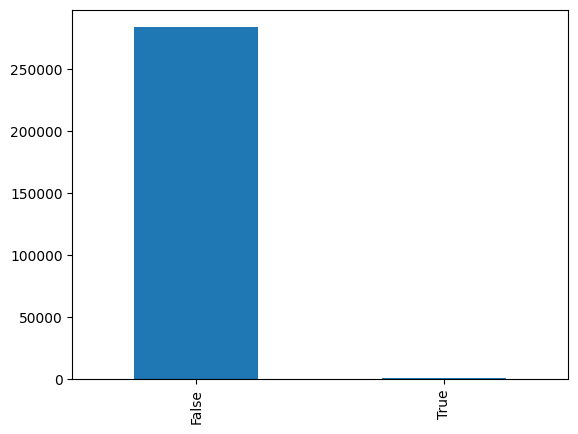

In [7]:
data.duplicated().value_counts().plot.bar()

In [8]:
data.drop_duplicates(inplace=True)

<Axes: >

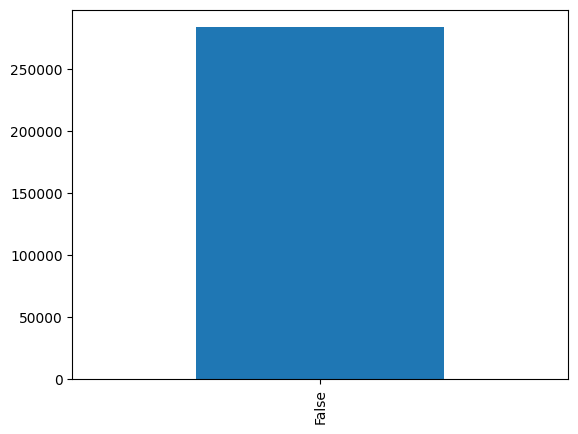

In [9]:
data.duplicated().value_counts().plot.bar()

In [10]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [11]:

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


splitting into dependent and independent variables

In [13]:
X=data.drop(columns=['Class','Time'])
y=pd.DataFrame(data.Class, columns=['Class'])

In [14]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
X_t,X_test,y_t,y_test = train_test_split(X,y, random_state=0,test_size=0.2)
X_train,X_val,y_train,y_val = train_test_split(X_t,y_t, random_state=0,test_size=0.2)

In [16]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
208634,2.109692,-0.282658,-1.601397,0.157529,0.253428,-0.420871,-0.048509,-0.050893,0.957046,0.136783,...,-0.314604,-0.368694,-1.102181,0.307043,-0.037267,-0.266569,0.215793,-0.094362,-0.064597,8.98
39245,1.053748,0.013416,0.069223,0.626361,-0.335350,-1.013352,0.422449,-0.186552,-0.425044,0.099097,...,0.045924,-0.266699,-1.056257,0.083267,0.510509,0.205813,-0.005070,-0.078369,0.017176,93.13
47254,-0.989392,1.293318,1.115086,-0.717161,0.590306,-0.084739,0.713956,0.084723,-0.478270,-0.299138,...,0.004422,-0.112918,-0.418050,-0.032361,-0.354185,-0.411338,-0.086474,-0.079769,0.190587,3.58
124587,-0.988540,-0.461739,1.980627,0.905616,0.283450,-0.722550,-0.297916,0.083711,0.102661,-0.427991,...,0.444744,0.307675,0.798343,0.128419,0.485237,-0.360081,0.499079,0.118564,0.186870,59.90
138934,-0.802157,1.247812,1.179001,1.261785,-0.222228,0.229187,0.170057,0.680090,-0.703300,-0.157482,...,0.018610,0.070837,0.389977,-0.072526,0.240541,-0.130200,-0.250525,0.297960,0.133787,14.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185987,2.001189,-0.094733,-1.090200,0.570819,-0.432203,-1.822925,0.340360,-0.516663,0.382659,0.112765,...,-0.192362,0.404687,1.402467,-0.014434,1.064466,0.234796,0.948717,-0.092840,-0.066925,17.90
223202,0.447240,1.334847,-3.029222,0.366486,3.793179,3.010099,0.698789,0.616111,-1.183914,-0.910841,...,0.320015,0.084315,0.453962,-0.231124,0.566220,-0.634618,1.042536,0.248615,0.270882,0.76
102753,-0.974941,0.689634,0.823912,-0.923401,1.579553,-1.074996,1.055522,-0.094849,-0.588977,-1.303515,...,-0.111182,-0.015863,-0.115064,-0.247861,-0.141180,0.127222,0.032042,-0.156552,-0.103905,0.76
49577,0.915184,-0.439310,0.985385,1.309120,-0.886112,0.363668,-0.572176,0.353048,0.709260,-0.042226,...,-0.094166,0.214717,0.606470,-0.151048,0.232794,0.444971,-0.220120,0.048760,0.029466,89.00


#UnderSampling and Oversampling

In [ ]:
y_train.Class.value_counts()

0    181261
1       323
Name: Class, dtype: int64

In [ ]:
cc = ClusterCentroids(sampling_strategy= 0.005 , estimator=MiniBatchKMeans(n_init=1, random_state=0),random_state=42, voting='soft',)
X_sampled,y_sampled = cc.fit_resample(X_train,y_train)

In [ ]:
y_sampled.Class.value_counts()

0    32300
1      323
Name: Class, dtype: int64

In [ ]:
X_fin,Y_fin = SMOTE(sampling_strategy=0.025,k_neighbors=5,random_state=42).fit_resample(X_sampled,y_sampled)

In [ ]:
Y_fin.Class.value_counts()

0    32300
1      807
Name: Class, dtype: int64

##utils function

In [17]:
scaler = StandardScaler().fit(X_train)
X_train_norm= scaler.transform(X_train)
X_val_norm  = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [18]:
METRICS = [ 
      #keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      #keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [19]:
def visualize_results(y_true,y_pred):
  print(classification_report(y_true,y_pred))
  ConfusionMatrixDisplay.from_predictions(y_true,y_pred)

In [20]:
def create_weighted_binary_crossentropy(zero_weight, one_weight):

    def weighted_binary_crossentropy(y_true, y_pred):

        b_ce = K.binary_crossentropy(from_logits=True)(y_pred,y_true)

        # Apply the weights
        print('error 3')
        weight_vector = y_true * one_weight + (1. - y_true) * zero_weight
        weighted_b_ce = weight_vector * b_ce
        print('error 4')
        # Return the mean error
        return K.mean(weighted_b_ce)

    return weighted_binary_crossentropy


#CNN

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='prc',  patience = 2,verbose=1,factor=0.25,min_lr=0.000001)

In [ ]:


def create_cnn():
  model = Sequential()
  #model.add(Dense(32, activation='relu', input_dim=29))
  model.add(Conv1D(256, 3, activation='relu', padding ='same', input_shape=(X_train.shape[-1],1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model





In [ ]:
cnn=create_cnn()
cnn.summary()
cnn.fit(X_train_norm,y_train, batch_size=2048, epochs=30, verbose=2, validation_data=(X_val_norm,y_val))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 29, 256)           1024      
                                                                 
 batch_normalization_7 (Batc  (None, 29, 256)          1024      
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 29, 256)           0         
                                                                 
 flatten_7 (Flatten)         (None, 7424)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 7425      
                                                                 
Total params: 9,473
Trainable params: 8,961
Non-trainable params: 512
_________________________________________________

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 - 4s - loss: 0.0559 - precision: 0.1078 - recall: 0.6943 - prc: 0.3813 - val_loss: 0.0405 - val_precision: 1.0000 - val_recall: 0.0635 - val_prc: 0.6791 - 4s/epoch - 45ms/step
Epoch 2/30
89/89 - 2s - loss: 0.0069 - precision: 0.8065 - recall: 0.6966 - prc: 0.6707 - val_loss: 0.0093 - val_precision: 0.8182 - val_recall: 0.4286 - val_prc: 0.7126 - 2s/epoch - 21ms/step
Epoch 3/30
89/89 - 2s - loss: 0.0066 - precision: 0.7857 - recall: 0.7152 - prc: 0.6751 - val_loss: 0.0051 - val_precision: 0.8605 - val_recall: 0.5873 - val_prc: 0.6777 - 2s/epoch - 20ms/step
Epoch 4/30
89/89 - 2s - loss: 0.0057 - precision: 0.8188 - recall: 0.7276 - prc: 0.7224 - val_loss: 0.0040 - val_precision: 1.0000 - val_recall: 0.3651 - val_prc: 0.7711 - 2s/epoch - 20ms/step
Epoch 5/30
89/89 - 2s - loss: 0.0053 - precision: 0.8310 - recall: 0.7461 - prc: 0.7391 - val_loss: 0.0038 - val_precision: 0.9000 - val_recall: 0.4286 - val_prc: 0.7240 - 2s/epoch - 20ms/step
Epoch 6/30
89/89 - 2s - loss: 0.0050 - precisi

In [ ]:
cnn_test_preds= cnn.predict(X_test_norm)
cnn_val_preds = cnn.predict(X_val_norm)

1419/1419 [==============================] - 2s 2ms/step


In [ ]:
m=keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_test, cnn_test_preds)
m.result().numpy()

0.74683654

In [ ]:
m=keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_val, cnn_val_preds)
m.result().numpy()


0.67593193

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.62      0.79      0.69        63

    accuracy                           1.00     45396
   macro avg       0.81      0.90      0.85     45396
weighted avg       1.00      1.00      1.00     45396



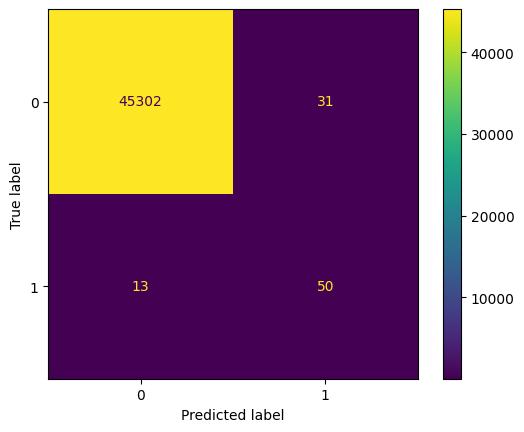

In [ ]:
visualize_results(y_val, cnn_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.63      0.80      0.71        87

    accuracy                           1.00     56746
   macro avg       0.82      0.90      0.85     56746
weighted avg       1.00      1.00      1.00     56746



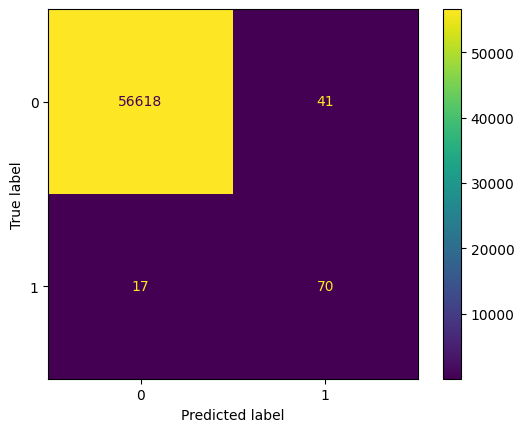

In [ ]:
visualize_results(y_test, cnn_test_preds>0.5)

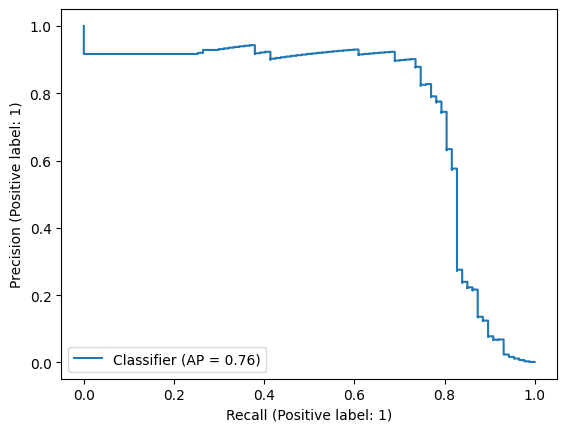

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, cnn_test_preds)

Results with Adam lr=0.001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.62      0.79      0.69        63

    accuracy                           1.00     45396
   macro avg       0.81      0.90      0.85     45396
weighted avg       1.00      1.00      1.00     45396



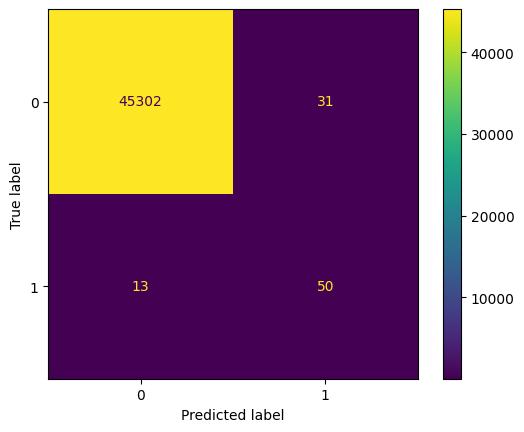

In [ ]:
visualize_results(y_val, cnn_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.63      0.80      0.71        87

    accuracy                           1.00     56746
   macro avg       0.82      0.90      0.85     56746
weighted avg       1.00      1.00      1.00     56746



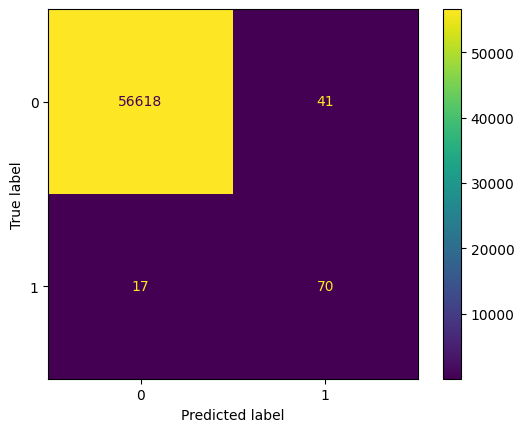

In [ ]:
visualize_results(y_test, cnn_test_preds>0.5)

Results with RMSPROP

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.82      0.78      0.80        63

    accuracy                           1.00     45396
   macro avg       0.91      0.89      0.90     45396
weighted avg       1.00      1.00      1.00     45396



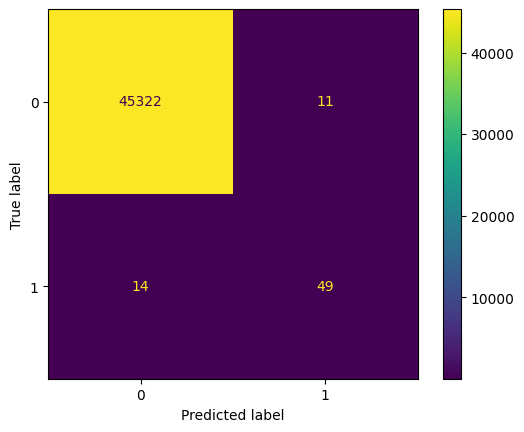

In [ ]:
visualize_results(y_val, cnn_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.80      0.77      0.78        87

    accuracy                           1.00     56746
   macro avg       0.90      0.88      0.89     56746
weighted avg       1.00      1.00      1.00     56746



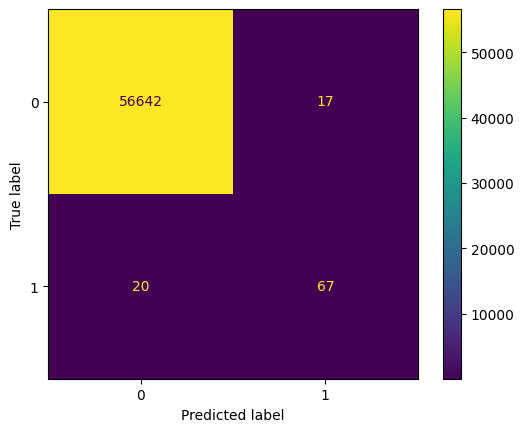

In [ ]:
visualize_results(y_test, cnn_test_preds>0.5)

#ANN model

In [ ]:
X_train.shape

(181584, 29)

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                classes=np.unique(y_train.Class), 
                y=y_train.Class)

In [ ]:
train_class_weights = dict(enumerate(class_weights))
print(train_class_weights)

{0: 0.5008909804094648, 1: 281.08978328173373}


In [ ]:
def create_dnn():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=X_train.shape[-1]))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=METRICS)
  return model                              

In [ ]:
w=0.1
dnn_model=create_dnn()
dnn_model.summary()
dnn_model.fit(X_train_norm,y_train, batch_size=2048, epochs=25, verbose =1, validation_data=(X_val_norm,y_val))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                960       
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
89/89 [==============================] - 2s 9ms/step - loss: 0.3747 - precision: 0.0121 - recall: 0.5596 - prc: 0.2836 - val_loss: 0.1704 - val_precision: 0.6316 - val_recall: 0.3810 - val_prc: 0.3810
Epoch 2/25
89/89 [==============================] - 1s 7ms/step - loss: 0.1076 - precision: 0.8556 - recall: 0.4768 - prc: 0.4372 - val_loss: 0.0639 - val_precision: 0.8333 - val_recall: 0.5556 - val_prc: 0.5612
Epoch 3/25
89/89 [==========

In [ ]:
dense_test_preds= dnn_model.predict(X_test_norm)
dense_val_preds = dnn_model.predict(X_val_norm)

1419/1419 [==============================] - 3s 2ms/step


PRAUC

In [ ]:
pd.DataFrame(dense_test_preds>0.5).value_counts()

False    56674
True        72
dtype: int64

In [ ]:
m = keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_val, dense_val_preds)
m.result().numpy()

0.8026731

In [ ]:
m = keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_test, dense_test_preds)
m.result().numpy()

0.77384025

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.83      0.71      0.77        63

    accuracy                           1.00     45396
   macro avg       0.92      0.86      0.88     45396
weighted avg       1.00      1.00      1.00     45396



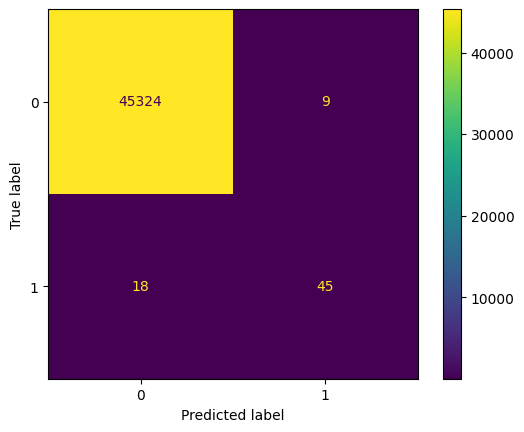

In [ ]:
visualize_results(y_val, dense_val_preds>0.5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.82      0.68      0.74        87

    accuracy                           1.00     56746
   macro avg       0.91      0.84      0.87     56746
weighted avg       1.00      1.00      1.00     56746



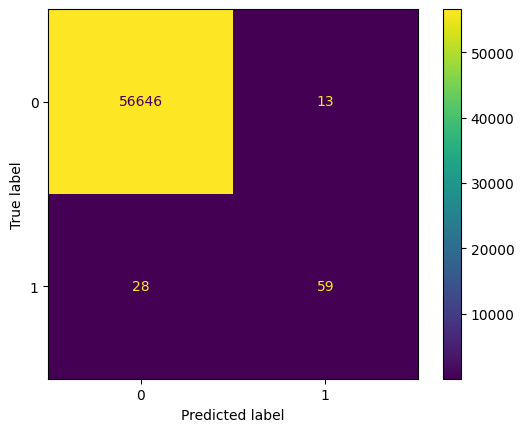

In [ ]:
visualize_results(y_test,dense_test_preds>0.5)

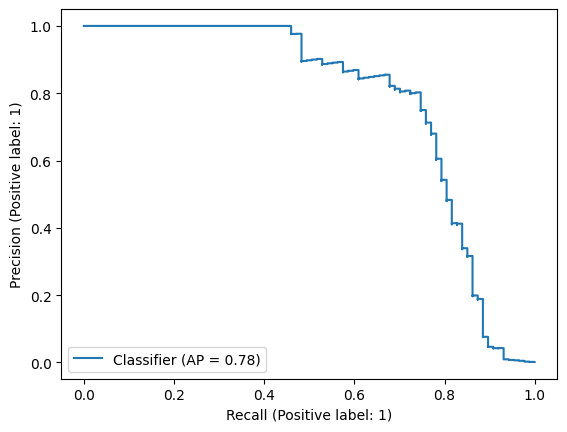

In [ ]:
PrecisionRecallDisplay.from_predictions(y_test, dense_test_preds)

##Weighted loss function

#custom loss cnn

In [31]:
import tensorflow as tf

def create_cnn_cust():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=29))
  # model.add(Conv1D(256, 3, activation='relu', padding ='same', input_shape=(29,1)))
  model.add(Dropout(0.2))

  # model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model





In [32]:
cnn_cust=create_cnn_cust()
cnn_cust.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                960       
                                                                 
 dropout_29 (Dropout)        (None, 32)                0         
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
w=0.02
validation_preds=[]
while(w<=0.2): 
  print("******************************for w = ",w)
  cnn_cust=create_cnn_cust()
  cnn_cust.summary()
  cnn_cust.fit(X_train_norm,y_train, batch_size=2048,epochs=20, verbose=1, validation_data=(X_val_norm,y_val), class_weight={0: w, 1: 1-w})
  cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
  #cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5
  validation_preds.append(cnn_cust_val_preds)
  w+=0.01
  

Classification Report for various weight distributions

In [ ]:
for i in range(len(validation_preds)):
  print("CLASSIFICATION REPORT FOR W=", 0.01 +i*(0.01))
  print(classification_report(y_val, validation_preds[i]))

In [ ]:
cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.71      0.79      0.75        63

    accuracy                           1.00     45396
   macro avg       0.86      0.90      0.88     45396
weighted avg       1.00      1.00      1.00     45396



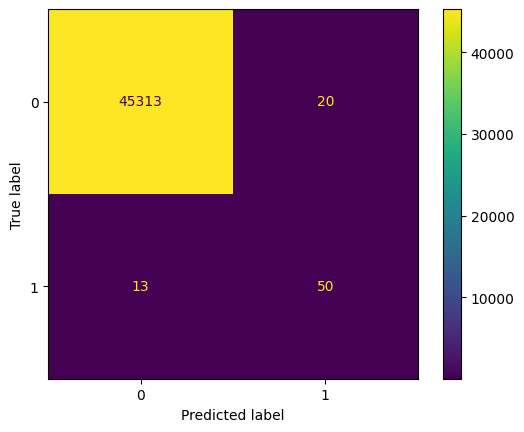

In [ ]:
visualize_results(y_val,cnn_cust_val_preds)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.68      0.78      0.73        87

    accuracy                           1.00     56746
   macro avg       0.84      0.89      0.86     56746
weighted avg       1.00      1.00      1.00     56746



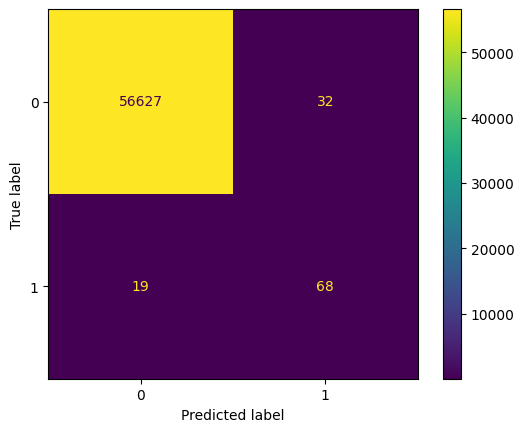

In [ ]:
visualize_results(y_test,cnn_cust_test_preds)

cnn + rmsprop + weighted loss

In [ ]:
w=0.02
validation_preds_rms=[]
while(w<=0.2): 
  print("******************************for w = ",w)
  cnn_cust=create_cnn_cust()
  cnn_cust.summary()
  cnn_cust.fit(X_train_norm,y_train, batch_size=2048,epochs=20, verbose=1, validation_data=(X_val_norm,y_val), class_weight={0: w, 1: 1-w})
  cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
  #cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5
  validation_preds_rms.append(cnn_cust_val_preds)
  w+=0.01

In [ ]:
for i in range(len(validation_preds)):
  print("CLASSIFICATION REPORT FOR W=", 0.01 +i*(0.01))
  print(classification_report(y_val, validation_preds_rms[i]))

In [33]:
w=0.01
val_preds_rms_gamma=[]
parameters=[]
for gamma in range(2,3):
  w=0.3
  while(w<=0.5): 
      print("****************************** w = ",w)
      print("****************************** w = ",gamma)
      cnn_cust=create_cnn_cust()
      cnn_cust.summary()
      cnn_cust.fit(X_train_norm,y_train, batch_size=2048,epochs=15, verbose=1, validation_data=(X_val_norm,y_val), class_weight={0: w**gamma, 1: (1-w)**gamma})
      cnn_cust_val_preds = cnn_cust.predict(X_val_norm)>0.5
      #cnn_cust_test_preds= cnn_cust.predict(X_test_norm)>0.5
      val_preds_rms_gamma.append(cnn_cust_val_preds)
      parameters.append([w,gamma])
      w+=0.02

****************************** w =  0.3
****************************** w =  2
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 32)                960       
                                                                 
 dropout_30 (Dropout)        (None, 32)                0         
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0339 - precision: 0.0103 - recall: 0.5500 - prc: 0.2038

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 9ms/step - loss: 0.0337 - precision: 0.0105 - recall: 0.5518 - prc: 0.2072 - val_loss: 0.1432 - val_precision: 0.7347 - val_recall: 0.5714 - val_prc: 0.5178
Epoch 2/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0090 - precision: 0.5971 - recall: 0.6471 - prc: 0.5340 - val_loss: 0.0369 - val_precision: 0.7679 - val_recall: 0.6825 - val_prc: 0.6384
Epoch 3/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0037 - precision: 0.8244 - recall: 0.7121 - prc: 0.6240 - val_loss: 0.0139 - val_precision: 0.7903 - val_recall: 0.7778 - val_prc: 0.6976
Epoch 4/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0023 - precision: 0.8512 - recall: 0.7616 - prc: 0.6865 - val_loss: 0.0076 - val_precision: 0.8167 - val_recall: 0.7778 - val_prc: 0.7093
Epoch 5/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0019 - precision: 0.8357 - recall: 0.7399 - prc: 0.6704 - val_loss: 0.0062 - val_precisio

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0400 - precision: 0.0131 - recall: 0.6542 - prc: 0.2751

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 9ms/step - loss: 0.0392 - precision: 0.0134 - recall: 0.6503 - prc: 0.2738 - val_loss: 0.1633 - val_precision: 0.8298 - val_recall: 0.6190 - val_prc: 0.6545
Epoch 2/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0115 - precision: 0.6762 - recall: 0.5882 - prc: 0.5246 - val_loss: 0.0449 - val_precision: 0.8776 - val_recall: 0.6825 - val_prc: 0.6864
Epoch 3/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0045 - precision: 0.8527 - recall: 0.6811 - prc: 0.6412 - val_loss: 0.0149 - val_precision: 0.8276 - val_recall: 0.7619 - val_prc: 0.7013
Epoch 4/15
89/89 [==============================] - 0s 6ms/step - loss: 0.0025 - precision: 0.8872 - recall: 0.7307 - prc: 0.6608 - val_loss: 0.0073 - val_precision: 0.8065 - val_recall: 0.7937 - val_prc: 0.7115
Epoch 5/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0019 - precision: 0.8696 - recall: 0.7430 - prc: 0.6742 - val_loss: 0.0053 - val_precisio

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


88/89 [============================>.] - ETA: 0s - loss: 0.0376 - precision: 0.0151 - recall: 0.3594 - prc: 0.1829

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 9ms/step - loss: 0.0375 - precision: 0.0151 - recall: 0.3575 - prc: 0.1805 - val_loss: 0.1400 - val_precision: 0.8696 - val_recall: 0.3175 - val_prc: 0.4060
Epoch 2/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0113 - precision: 0.8079 - recall: 0.4427 - prc: 0.4244 - val_loss: 0.0366 - val_precision: 0.8500 - val_recall: 0.5397 - val_prc: 0.6206
Epoch 3/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0041 - precision: 0.8729 - recall: 0.6378 - prc: 0.6045 - val_loss: 0.0122 - val_precision: 0.8400 - val_recall: 0.6667 - val_prc: 0.6702
Epoch 4/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0023 - precision: 0.8664 - recall: 0.7028 - prc: 0.6475 - val_loss: 0.0067 - val_precision: 0.8033 - val_recall: 0.7778 - val_prc: 0.6783
Epoch 5/15
89/89 [==============================] - 0s 6ms/step - loss: 0.0018 - precision: 0.8745 - recall: 0.7337 - prc: 0.6658 - val_loss: 0.0053 - val_precisio

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


81/89 [==========================>...] - ETA: 0s - loss: 0.0534 - precision: 0.0064 - recall: 0.3768 - prc: 0.0589

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 9ms/step - loss: 0.0508 - precision: 0.0069 - recall: 0.3731 - prc: 0.0620 - val_loss: 0.1472 - val_precision: 0.7778 - val_recall: 0.4444 - val_prc: 0.4721
Epoch 2/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0128 - precision: 0.5294 - recall: 0.5294 - prc: 0.4452 - val_loss: 0.0359 - val_precision: 0.8837 - val_recall: 0.6032 - val_prc: 0.6143
Epoch 3/15
89/89 [==============================] - 0s 6ms/step - loss: 0.0045 - precision: 0.8508 - recall: 0.6533 - prc: 0.5901 - val_loss: 0.0117 - val_precision: 0.8542 - val_recall: 0.6508 - val_prc: 0.6759
Epoch 4/15
89/89 [==============================] - 1s 7ms/step - loss: 0.0026 - precision: 0.8643 - recall: 0.6904 - prc: 0.6375 - val_loss: 0.0064 - val_precision: 0.8421 - val_recall: 0.7619 - val_prc: 0.6963
Epoch 5/15
89/89 [==============================] - 1s 7ms/step - loss: 0.0019 - precision: 0.8628 - recall: 0.7399 - prc: 0.6696 - val_loss: 0.0049 - val_precisio

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0979 - precision: 0.0034 - recall: 0.6330 - prc: 0.0395

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 13ms/step - loss: 0.0959 - precision: 0.0035 - recall: 0.6321 - prc: 0.0400 - val_loss: 0.3179 - val_precision: 0.0854 - val_recall: 0.3810 - val_prc: 0.0850
Epoch 2/15
89/89 [==============================] - 1s 8ms/step - loss: 0.0293 - precision: 0.1407 - recall: 0.4706 - prc: 0.3205 - val_loss: 0.0924 - val_precision: 0.8158 - val_recall: 0.4921 - val_prc: 0.5367
Epoch 3/15
89/89 [==============================] - 1s 8ms/step - loss: 0.0100 - precision: 0.8371 - recall: 0.5728 - prc: 0.5144 - val_loss: 0.0266 - val_precision: 0.8333 - val_recall: 0.5556 - val_prc: 0.6572
Epoch 4/15
89/89 [==============================] - 0s 6ms/step - loss: 0.0041 - precision: 0.8560 - recall: 0.6440 - prc: 0.5864 - val_loss: 0.0096 - val_precision: 0.8235 - val_recall: 0.6667 - val_prc: 0.6901
Epoch 5/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0024 - precision: 0.8621 - recall: 0.6966 - prc: 0.6660 - val_loss: 0.0054 - val_precisi

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0746 - precision: 0.0037 - recall: 0.3061 - prc: 0.0710

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 14ms/step - loss: 0.0738 - precision: 0.0037 - recall: 0.3031 - prc: 0.0699 - val_loss: 0.1845 - val_precision: 0.5500 - val_recall: 0.1746 - val_prc: 0.2106
Epoch 2/15
89/89 [==============================] - 1s 9ms/step - loss: 0.0181 - precision: 0.4364 - recall: 0.3715 - prc: 0.3253 - val_loss: 0.0421 - val_precision: 0.8919 - val_recall: 0.5238 - val_prc: 0.6338
Epoch 3/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0056 - precision: 0.8584 - recall: 0.6006 - prc: 0.5847 - val_loss: 0.0122 - val_precision: 0.8958 - val_recall: 0.6825 - val_prc: 0.6782
Epoch 4/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0026 - precision: 0.8612 - recall: 0.6533 - prc: 0.6316 - val_loss: 0.0059 - val_precision: 0.8727 - val_recall: 0.7619 - val_prc: 0.6768
Epoch 5/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0019 - precision: 0.8726 - recall: 0.6997 - prc: 0.6702 - val_loss: 0.0043 - val_precisi

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0566 - precision: 0.0092 - recall: 0.2929 - prc: 0.0507

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 13ms/step - loss: 0.0552 - precision: 0.0092 - recall: 0.2902 - prc: 0.0503 - val_loss: 0.1078 - val_precision: 0.8696 - val_recall: 0.3175 - val_prc: 0.3678
Epoch 2/15
89/89 [==============================] - 1s 8ms/step - loss: 0.0125 - precision: 0.6502 - recall: 0.4892 - prc: 0.4178 - val_loss: 0.0237 - val_precision: 0.8780 - val_recall: 0.5714 - val_prc: 0.6177
Epoch 3/15
89/89 [==============================] - 1s 9ms/step - loss: 0.0041 - precision: 0.8423 - recall: 0.6285 - prc: 0.6027 - val_loss: 0.0083 - val_precision: 0.8750 - val_recall: 0.6667 - val_prc: 0.7108
Epoch 4/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0022 - precision: 0.8716 - recall: 0.6935 - prc: 0.6556 - val_loss: 0.0050 - val_precision: 0.8571 - val_recall: 0.7619 - val_prc: 0.7071
Epoch 5/15
89/89 [==============================] - 1s 9ms/step - loss: 0.0017 - precision: 0.8792 - recall: 0.7214 - prc: 0.6714 - val_loss: 0.0040 - val_precisi

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


84/89 [===========================>..] - ETA: 0s - loss: 0.0528 - precision: 0.0074 - recall: 0.1557 - prc: 0.0483

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 9ms/step - loss: 0.0513 - precision: 0.0077 - recall: 0.1528 - prc: 0.0464 - val_loss: 0.0942 - val_precision: 0.5000 - val_recall: 0.0159 - val_prc: 0.0692
Epoch 2/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0118 - precision: 0.7769 - recall: 0.3127 - prc: 0.3370 - val_loss: 0.0207 - val_precision: 0.8857 - val_recall: 0.4921 - val_prc: 0.5934
Epoch 3/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0038 - precision: 0.8702 - recall: 0.5604 - prc: 0.5780 - val_loss: 0.0071 - val_precision: 0.8400 - val_recall: 0.6667 - val_prc: 0.6478
Epoch 4/15
89/89 [==============================] - 1s 7ms/step - loss: 0.0020 - precision: 0.8846 - recall: 0.6409 - prc: 0.6535 - val_loss: 0.0045 - val_precision: 0.8302 - val_recall: 0.6984 - val_prc: 0.6851
Epoch 5/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0016 - precision: 0.8710 - recall: 0.6687 - prc: 0.6674 - val_loss: 0.0038 - val_precisio

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/89 [============================>.] - ETA: 0s - loss: 0.0751 - precision: 0.0103 - recall: 0.4921 - prc: 0.2109

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 9ms/step - loss: 0.0742 - precision: 0.0103 - recall: 0.4896 - prc: 0.2103 - val_loss: 0.1283 - val_precision: 0.8750 - val_recall: 0.4444 - val_prc: 0.4811
Epoch 2/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0172 - precision: 0.6333 - recall: 0.4706 - prc: 0.4254 - val_loss: 0.0284 - val_precision: 0.8889 - val_recall: 0.5079 - val_prc: 0.5969
Epoch 3/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0054 - precision: 0.8565 - recall: 0.5542 - prc: 0.5473 - val_loss: 0.0093 - val_precision: 0.8542 - val_recall: 0.6508 - val_prc: 0.6564
Epoch 4/15
89/89 [==============================] - 0s 5ms/step - loss: 0.0026 - precision: 0.8543 - recall: 0.6533 - prc: 0.6383 - val_loss: 0.0051 - val_precision: 0.8776 - val_recall: 0.6825 - val_prc: 0.6936
Epoch 5/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0019 - precision: 0.8577 - recall: 0.6347 - prc: 0.6439 - val_loss: 0.0041 - val_precisio

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


85/89 [===========================>..] - ETA: 0s - loss: 0.0780 - precision: 0.0054 - recall: 0.2312 - prc: 0.0296

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 2s 10ms/step - loss: 0.0761 - precision: 0.0058 - recall: 0.2383 - prc: 0.0294 - val_loss: 0.1173 - val_precision: 0.7857 - val_recall: 0.1746 - val_prc: 0.2393
Epoch 2/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0168 - precision: 0.5573 - recall: 0.3313 - prc: 0.2850 - val_loss: 0.0253 - val_precision: 0.8710 - val_recall: 0.4286 - val_prc: 0.5665
Epoch 3/15
89/89 [==============================] - 1s 6ms/step - loss: 0.0051 - precision: 0.8564 - recall: 0.5356 - prc: 0.5050 - val_loss: 0.0083 - val_precision: 0.8788 - val_recall: 0.4603 - val_prc: 0.6187
Epoch 4/15
89/89 [==============================] - 1s 7ms/step - loss: 0.0025 - precision: 0.8591 - recall: 0.5851 - prc: 0.5759 - val_loss: 0.0047 - val_precision: 0.8409 - val_recall: 0.5873 - val_prc: 0.6701
Epoch 5/15
89/89 [==============================] - 1s 8ms/step - loss: 0.0017 - precision: 0.8622 - recall: 0.6006 - prc: 0.6485 - val_loss: 0.0038 - val_precisi

In [34]:
for i in range (len(val_preds_rms_gamma)):
  print("parameters for this case : (w,gamma) " ,parameters[i] )
  print(classification_report(y_val, val_preds_rms_gamma[i]))
  m = keras.metrics.AUC(name='prc', curve='PR')
  m.update_state(y_val, val_preds_rms_gamma[i])
  print("prauc",m.result().numpy())
        

parameters for this case : (w,gamma)  [0.3, 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.78      0.78      0.78        63

    accuracy                           1.00     45396
   macro avg       0.89      0.89      0.89     45396
weighted avg       1.00      1.00      1.00     45396

prauc 0.60658675
parameters for this case : (w,gamma)  [0.32, 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.78      0.81      0.80        63

    accuracy                           1.00     45396
   macro avg       0.89      0.90      0.90     45396
weighted avg       1.00      1.00      1.00     45396

prauc 0.6366182
parameters for this case : (w,gamma)  [0.34, 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.80      0.78      0.79        63

    ac

In [ ]:
prediction_pd = pd.DataFrame(val_preds_rms_gamma)
parameters_pd = pd.DataFrame(parameters)

In [ ]:
val_preds_rms_gamma[0].shape

(45396, 1)

#Parameter Tuning using Keras Tuner

In [ ]:
layer1_units=1
drop_out_layer1=2
layer_2_units=3
drop_out_layer_2=4
layer_3_units=5
dropout_layer3=6
layer_4_units=7
dropout_layer4=8
learningrate=9
optimizer=10

In [ ]:
def create_dnn_tune(args):
  model = Sequential()
  model.add(Dense(args[layer1_units], activation='relu', input_dim=X_train.shape[-1]))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer=args[optimizer],loss='binary_crossentropy',metrics=METRICS)
  return model  

In [ ]:
### TUNING CLASS
class LSTMHyperModel(kt.HyperModel):
  def build(self, hp):
    args = {}
    args[layer1_units] = hp.Int("base layer units", min_value=32, max_value=128, step=32)
    args[optimizer] = hp.Choice("optimizer", ['adam', 'adagrad', 'rmsprop'])
    # args[learningrate] = hp.Choice("learning_rate", [.001, .01, .005])

    model = create_dnn_tune(args)
    return model

In [ ]:
tuner = kt.BayesianOptimization(
    hypermodel=LSTMHyperModel(),
    objective=kt.Objective("val_prc", direction="max"),
    directory='keras_tuner_outputs',
    project_name='models',
    overwrite=True,
    max_trials=20
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
base layer units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'adagrad', 'rmsprop'], 'ordered': False}


In [ ]:
tuner.search(X_train_norm,y_train ,batch_size=2048, epochs=15,  validation_data=(X_val_norm,y_val), callbacks=[learning_rate_reduction] )

Trial 20 Complete [00h 00m 11s]
val_prc: 0.806682825088501

Best val_prc So Far: 0.811677098274231
Total elapsed time: 00h 03m 46s


In [ ]:
tuner.results_summary()

In [ ]:
best_preds_test_ann= tuner.get_best_models()[0].predict(X_test_norm)
best_preds_val_ann = tuner.get_best_models()[0].predict(X_val_norm)

In [ ]:
## PRAUC on test data
m=keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_test, best_preds_test_ann)
m.result().numpy()

0.7827586

In [ ]:
## PRAUC on validation data
m=keras.metrics.AUC(name='prc', curve='PR')
m.update_state(y_val, best_preds_val_ann)
m.result().numpy()

0.8116771

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.85      0.66      0.74        87

    accuracy                           1.00     56746
   macro avg       0.93      0.83      0.87     56746
weighted avg       1.00      1.00      1.00     56746



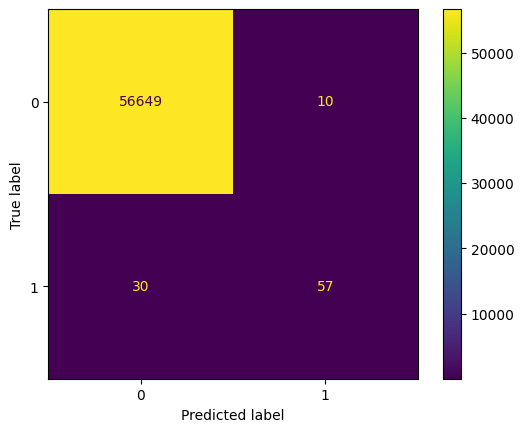

In [ ]:
visualize_results(y_test, best_preds_test_ann>0.5)

##Feature Selection

#Feature selection using variance

In [ ]:
data_FS = data[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9','V10', 'Amount', 'Class']]

In [ ]:
X_FS = data_FS.drop(columns=['Class'])
Y_FS = pd.DataFrame(data['Class'], columns=['Class'])

In [ ]:
x_fs,X_test_fs,y_fs,Y_test_fs= train_test_split(X_FS,Y_FS, random_state=0, test_size=0.2)
X_train_fs,X_val_fs,Y_train_fs,Y_val_fs= train_test_split(x_fs,y_fs, random_state=0, test_size=0.2)

In [ ]:
scaler_fs=StandardScaler().fit(X_train_fs)
X_train_norm_fs= scaler_fs.transform(X_train_fs)
X_val_norm_fs  = scaler_fs.transform(X_val_fs)
X_test_norm_fs = scaler_fs.transform(X_test_fs)

In [ ]:
import tensorflow as tf

def create_cnn():
  model = Sequential()
  model.add(Dense(32, activation='relu', input_dim=29))
  # model.add(Conv1D(128, 3, activation='relu', padding ='same', input_shape=(X_train_fs.shape[-1],1)))
  # model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))

  model.compile(optimizer='rmsprop',loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=METRICS)
  return model



In [ ]:
cnn_fs = create_cnn()
cnn_fs.summary()
cnn_fs.fit(X_train_norm_fs,Y_train_fs, batch_size=2048, epochs=100, validation_data=(X_val_norm_fs,Y_val_fs))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 12, 128)           512       
                                                                 
 dropout_11 (Dropout)        (None, 12, 128)           0         
                                                                 
 flatten_11 (Flatten)        (None, 1536)              0         
                                                                 
 dense_17 (Dense)            (None, 1)                 1537      
                                                                 
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


82/89 [==========================>...] - ETA: 0s - loss: 0.1081 - precision: 0.0697 - recall: 0.1296 - prc: 0.1205

/usr/local/lib/python3.9/dist-packages/keras/backend.py:5703: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


89/89 [==============================] - 3s 10ms/step - loss: 0.1016 - precision: 0.0697 - recall: 0.1192 - prc: 0.1109 - val_loss: 0.0132 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_prc: 0.0242
Epoch 2/100
89/89 [==============================] - 1s 6ms/step - loss: 0.0076 - precision: 0.8435 - recall: 0.3003 - prc: 0.5423 - val_loss: 0.0039 - val_precision: 0.9091 - val_recall: 0.4762 - val_prc: 0.6832
Epoch 3/100
89/89 [==============================] - 1s 6ms/step - loss: 0.0049 - precision: 0.8606 - recall: 0.5542 - prc: 0.6741 - val_loss: 0.0034 - val_precision: 0.9024 - val_recall: 0.5873 - val_prc: 0.6917
Epoch 4/100
89/89 [==============================] - 1s 7ms/step - loss: 0.0045 - precision: 0.8744 - recall: 0.6037 - prc: 0.6904 - val_loss: 0.0033 - val_precision: 0.8864 - val_recall: 0.6190 - val_prc: 0.7132
Epoch 5/100
89/89 [==============================] - 1s 6ms/step - loss: 0.0043 - precision: 0.8733 - recall: 0.5975 - prc: 0.6980 - val_loss: 0.0033 -

In [ ]:
cnn_fs_val_preds = cnn_fs.predict(X_val_norm_fs)>0.5


1419/1419 [==============================] - 3s 2ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45333
           1       0.82      0.71      0.76        63

    accuracy                           1.00     45396
   macro avg       0.91      0.86      0.88     45396
weighted avg       1.00      1.00      1.00     45396



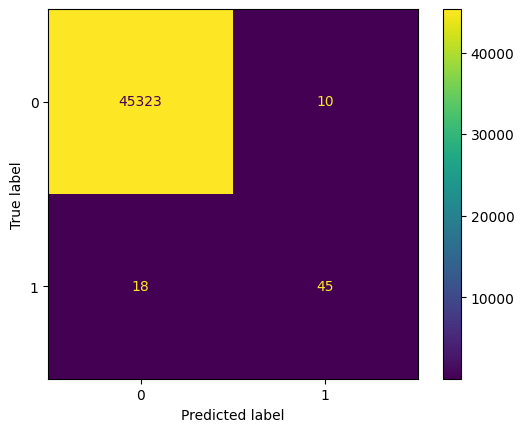

In [ ]:
visualize_results(Y_val_fs,cnn_fs_val_preds)

1774/1774 [==============================] - 3s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56659
           1       0.83      0.69      0.75        87

    accuracy                           1.00     56746
   macro avg       0.92      0.84      0.88     56746
weighted avg       1.00      1.00      1.00     56746



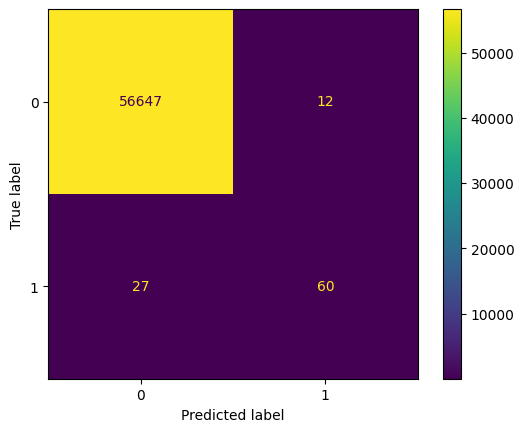

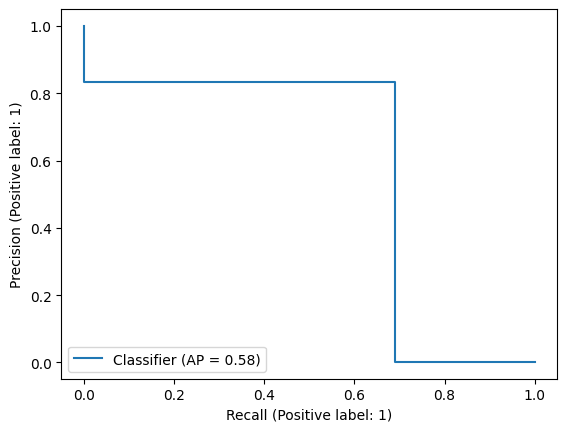

In [ ]:
cnn_fs_test_preds=cnn_fs.predict(X_test_norm_fs)>0.5
visualize_results(Y_test_fs,cnn_fs_test_preds)
PrecisionRecallDisplay.from_predictions(Y_test_fs, cnn_fs_test_preds)